In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/network_models_sim_params/results'
else:
    path = '/results'

In [12]:
# nw_model = 'ER'
Nsites = 2
nw_model = 'BA'

resFile = f'resultsNetwork_model_{nw_model}_sim_Nsites_{Nsites}.csv'

In [15]:
N = 500
pi1, pi2 = 0.1, 0.1
q1, q2 = 7.0, 10.0
l = 0.6
df = pd.read_csv(path +'/'+ resFile)
df = df.query('N == @N & pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & l == @l')

In [16]:
df

,N,nw_param,pi1,pi2,q1,q2,l,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,Nrea,simTime,ic
1,500,4,0.1,0.1,7.0,10.0,0.6,0.156153,0.132391,0.711456,0.01807,0.031839,0.036963,0.446674,0.097611,100,2000,N


In [8]:
# get mean field results:
subprocess.call(f'python ../det_sols_from_polynomial/f0poly_sols_clean.py {pi1} {pi2} {q1} {q2} {l} -v > sols.dat', shell=True)
sols = []
with open('sols.dat', 'r') as file:
    for line in file.readlines():
        sols_i = [float(f) for f in line.split()]
        sols.append(sols_i)
sol_index=0 if l==0.0  else 1 
fsMF = sols[sol_index]

In [4]:
df

,N,nw_param,pi1,pi2,q1,q2,l,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,Nrea,simTime,ic
8,500,0.02,0.1,0.1,7.0,10.0,0.6,0.155342,0.127543,0.717115,0.017600,0.026411,0.031277,0.462030,0.080625,100,2000,N
11,500,0.04,0.1,0.1,7.0,10.0,0.6,0.153889,0.123423,0.722688,0.017490,0.026733,0.031713,0.475841,0.081813,100,2000,N
14,500,0.06,0.1,0.1,7.0,10.0,0.6,0.153367,0.121196,0.725437,0.017403,0.026135,0.031118,0.483044,0.079985,100,2000,N
17,500,0.08,0.1,0.1,7.0,10.0,0.6,0.153288,0.120776,0.725937,0.017426,0.025571,0.030522,0.484385,0.078170,100,2000,N
19,500,0.10,0.1,0.1,7.0,10.0,0.6,0.153023,0.120659,0.726317,0.017329,0.025490,0.030354,0.484999,0.077858,100,2000,N


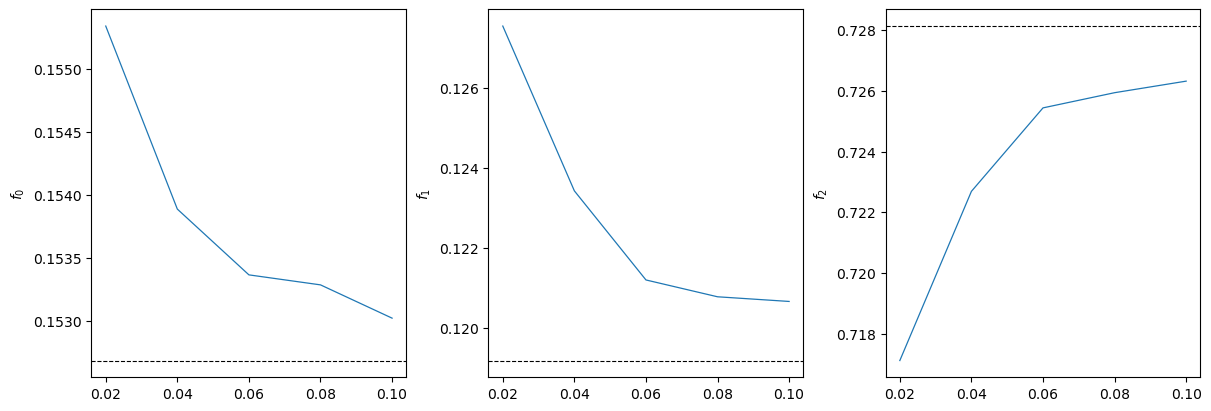

In [11]:
fig, ax = plt.subplots(1,3,figsize=(12,4), constrained_layout=True)

if nw_model == 'ER':
    xlabel = 'p'

for i in range(3):
    ax[i].plot(df['nw_param'], df[f'f{i}'], lw=0.9)
    ax[i].axhline(fsMF[i], ls='--', lw=0.8, color='k')
    ax[i].set_ylabel(f'$f_{i}$', xlabel=xlabel)
